In [1]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut, train_test_split, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns

In [2]:
# This serves to transpose the dataframe so that each frequency is a feature and each audio file is an entry
def format_df(df, class_label):
    new_df_dict = {}
    frequencies = df["Frequency(Hz)"].unique()
    for frequency in frequencies:
        if not np.isnan(frequency):
            new_df_dict[frequency] = []
            temp_df = df.loc[df["Frequency(Hz)"] == frequency].reset_index()
            for col in temp_df:
                value_list = temp_df[col].values
                val = float(value_list[0])
                new_df_dict[frequency].append(val)
    new_df = pd.DataFrame(new_df_dict)
    new_df["Class"] = class_label
    return new_df

In [3]:
def plot_confusion_matrix(y_true, y_pred, model_name, class_labels):
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

In [4]:
def run_models(df):

    # Prep features and target
    features = df.drop(columns=["Class"])
    feature_names = features.columns
    target = df.Class
    class_labels = np.unique(target)
    cv = LeaveOneOut()

    # SVM
    svm = SVC(kernel="linear")
    actual_class = []
    predicted_class = []
    
    for train_index, test_index in cv.split(features):

        # Splitting into training and testing
        X_train, X_test = features.take(train_index), features.take(test_index)
        y_train, y_test = target.take(train_index), target.take(test_index)

        svm = svm.fit(X_train, y_train)
        y_pred = svm.predict(X_test)

        actual_class.append(y_test.item())
        predicted_class.append(y_pred[0])

    print(f"SVM Accuracy: {accuracy_score(actual_class, predicted_class)*100:.2f}%")
    plot_confusion_matrix(actual_class, predicted_class, "SVM", class_labels)

    # Random Forest
    rf = RandomForestClassifier()
    actual_class = []
    predicted_class = []
    
    for train_index, test_index in cv.split(features):
        
        # Splitting into training and testing
        X_train, X_test = features.take(train_index), features.take(test_index)
        y_train, y_test = target.take(train_index), target.take(test_index)

        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)

        actual_class.append(y_test.item())
        predicted_class.append(y_pred[0])

    print(f"RF Accuracy: {accuracy_score(actual_class, predicted_class)*100:.2f}%")
    plot_confusion_matrix(actual_class, predicted_class, "RF", class_labels)

    # XGBoost 
    xgb = GradientBoostingClassifier()
    actual_class = []
    predicted_class = []
    
    for train_index, test_index in cv.split(features):
        
        # Splitting into training and testing
        X_train, X_test = features.take(train_index), features.take(test_index)
        y_train, y_test = target.take(train_index), target.take(test_index)

        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)

        actual_class.append(y_test.item())
        predicted_class.append(y_pred[0])

    print(f"XGBoost Accuracy: {accuracy_score(actual_class, predicted_class)*100:.2f}%")
    plot_confusion_matrix(actual_class, predicted_class, "XGBoost", class_labels)

SVM Accuracy: 57.14%


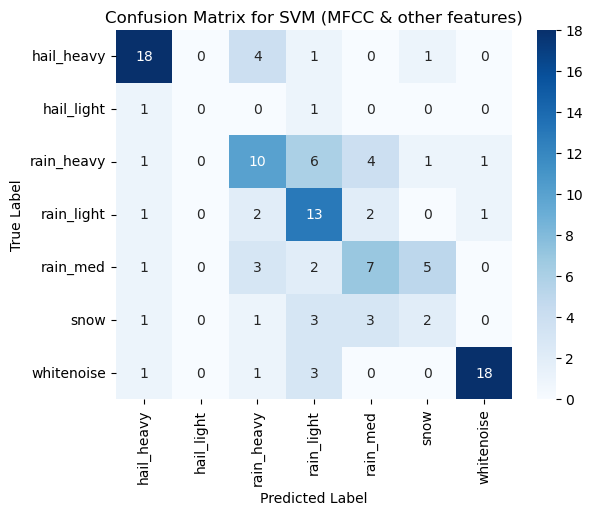

RF Accuracy: 56.30%


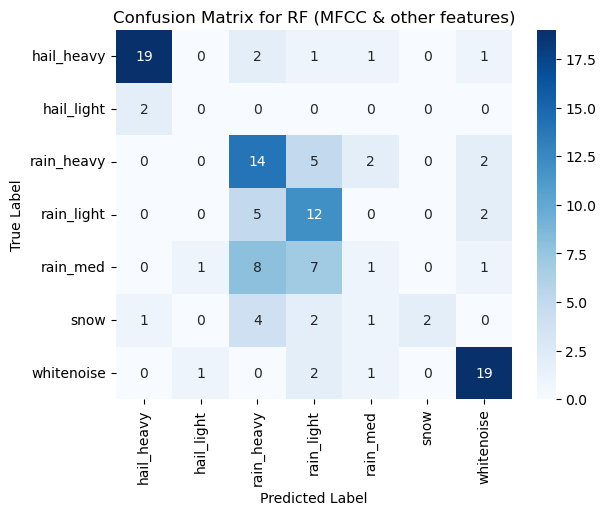

In [ ]:
fft_files = glob.glob("../Soheyl_Codes/Data/*")
df_list = []
for file in fft_files:
    df = pd.read_csv(file)
    class_label = file.split('/')[-1].split('.')[0]
    new_df = format_df(df, class_label)
    df_list.append(new_df)

all_classes_df = pd.concat(df_list, ignore_index=True).dropna()
run_models(all_classes_df)